In [78]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [87]:
# Get the data for apple
ticker = "AAPL"  

# Download the data
data = yf.download(ticker, start="2021-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


In [88]:
# Calculate log returns to represent volatility
data["Returns"] = np.log(data["Adj Close"] / data["Adj Close"].shift(1))
data = data.dropna()

C:\Users\user\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003056. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1988.34
Distribution:                  Normal   AIC:                          -3970.67
Method:            Maximum Likelihood   BIC:                          -3956.81
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        09:25:46   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.3882e-04  6.499e-04      1.445      0.149 

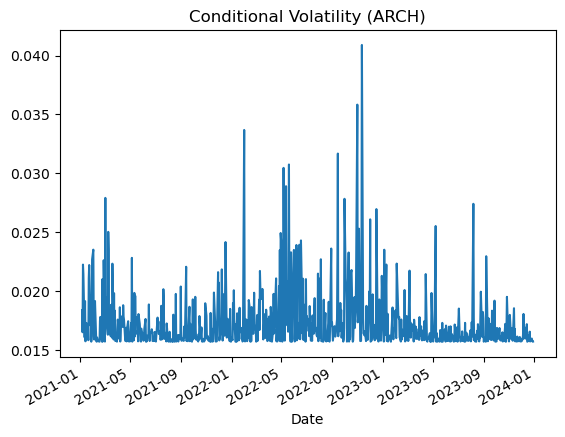

In [89]:
# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'], vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

# Plot the conditional volatility
arch_model_fit.conditional_volatility.plot(title='Conditional Volatility (ARCH)')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003056. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2019.76
Distribution:                  Normal   AIC:                          -4031.52
Method:            Maximum Likelihood   BIC:                          -4013.03
                                        No. Observations:                  752
Date:                Thu, Jul 25 2024   Df Residuals:                      751
Time:                        09:25:46   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.1674e-03  7.238e-05     16.129  1.608e-58 [1.

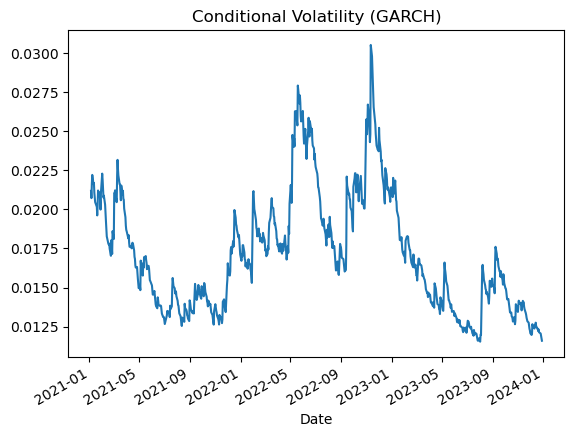

In [90]:
# Fit a GARCH model
garch_model_fit = arch_model(data['Returns'], vol='Garch', p=1, q=1).fit(disp='off')
print(garch_model_fit.summary())

# Plot the conditional volatility
garch_model_fit.conditional_volatility.plot(title='Conditional Volatility (GARCH)')
plt.show()


In [91]:
# Fit a GARCH model for forecasting
am = arch_model(100 * data['Returns'], vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1470.8255391044174
Iteration:     10,   Func. Count:     63,   Neg. LLF: 1442.2412054705562
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1442.2412054705562
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11


In [92]:
# Forecasting
forecasts = res.forecast(horizon=90)

# Print forecast results
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2023-12-29  0.116007  0.116007  0.116007  0.116007  0.116007  0.116007   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2023-12-29  0.116007  0.116007  0.116007  0.116007  ...  0.116007  0.116007   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2023-12-29  0.116007  0.116007  0.116007  0.116007  0.116007  0.116007   

                h.89      h.90  
Date                            
2023-12-29  0.116007  0.116007  

[1 rows x 90 columns]
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2023-12-29  1.101888  1.120819  1.139518  1.15

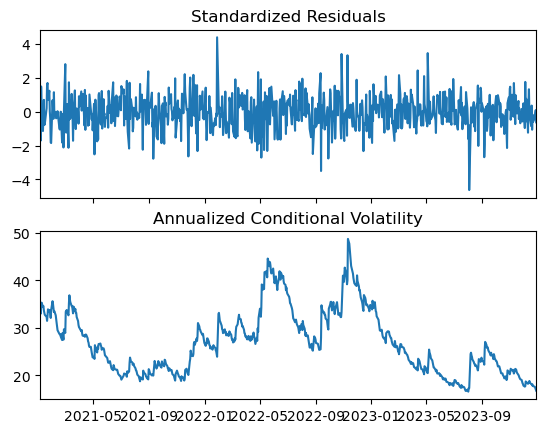

In [93]:
# Plot forecasted conditional volatility
fig = res.plot(annualize="D")
plt.show()
